              points         price
count  103322.000000  96359.000000
mean       88.540630     36.781224
std         3.090903     42.867069
min        80.000000      4.000000
25%        86.000000     18.000000
50%        88.000000     27.000000
75%        91.000000     45.000000
max       100.000000   3300.000000
user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot      

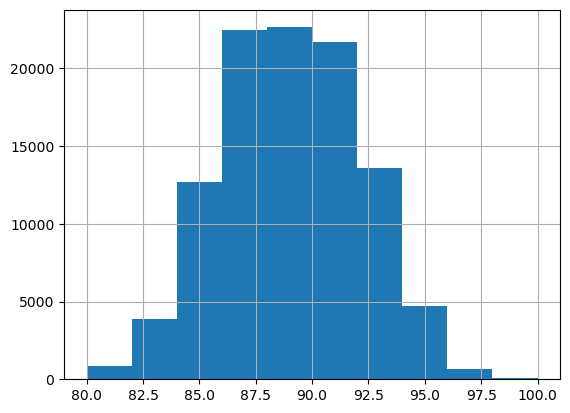

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("OSX_DS_assignment.csv")

# Check basic statistics and missing values
print(data.describe())
print(data.isnull().sum())

# Analyze the distribution of variables
print(data["variety"].value_counts())
print(data["points"].hist())


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the data
X = data["review_description"]
y = data["variety"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.6737962738930559


In [3]:
average_rating_by_variety = data.groupby("variety")["points"].mean()
top_rated_varieties = average_rating_by_variety.nlargest(5)


In [4]:
data["price_per_point"] = data["price"] / data["points"]
best_value_wines = data.nsmallest(5, "price_per_point")


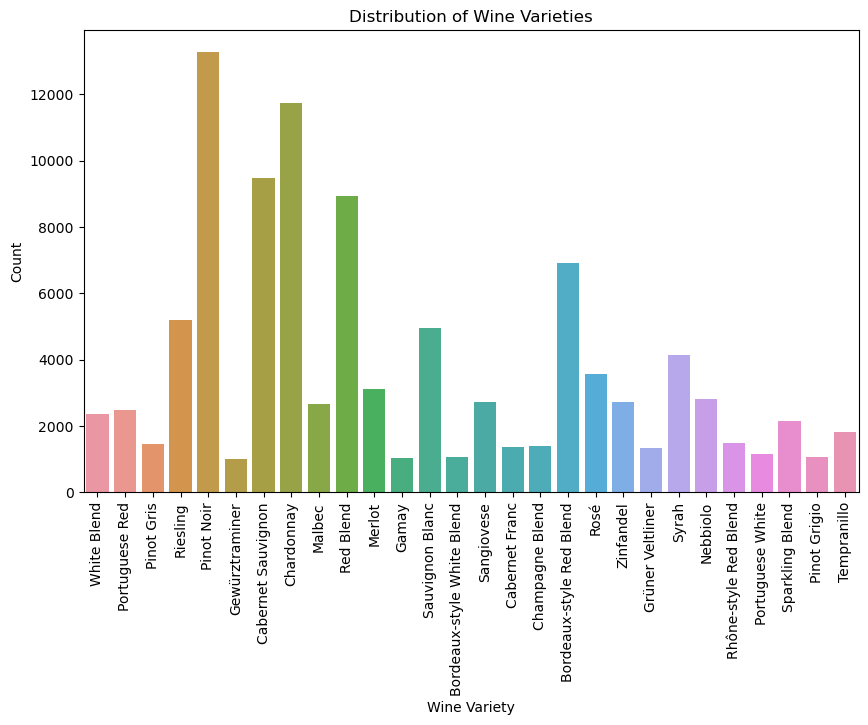

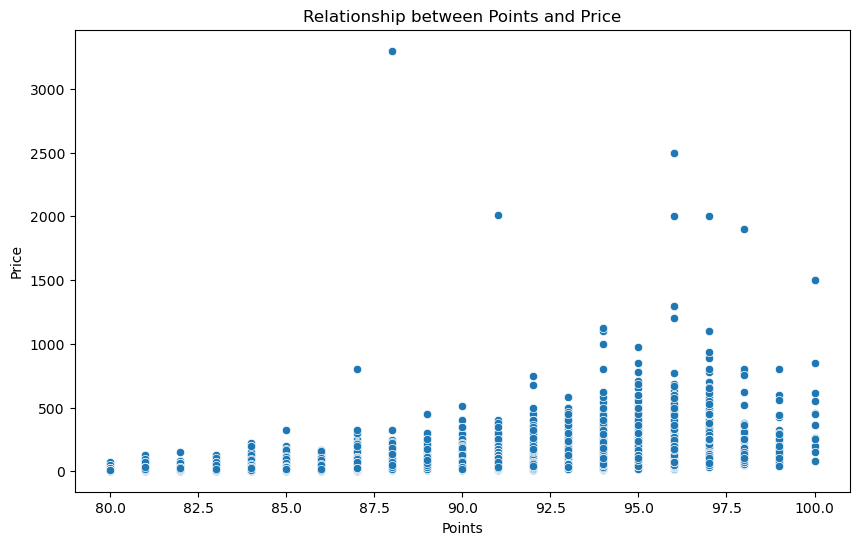

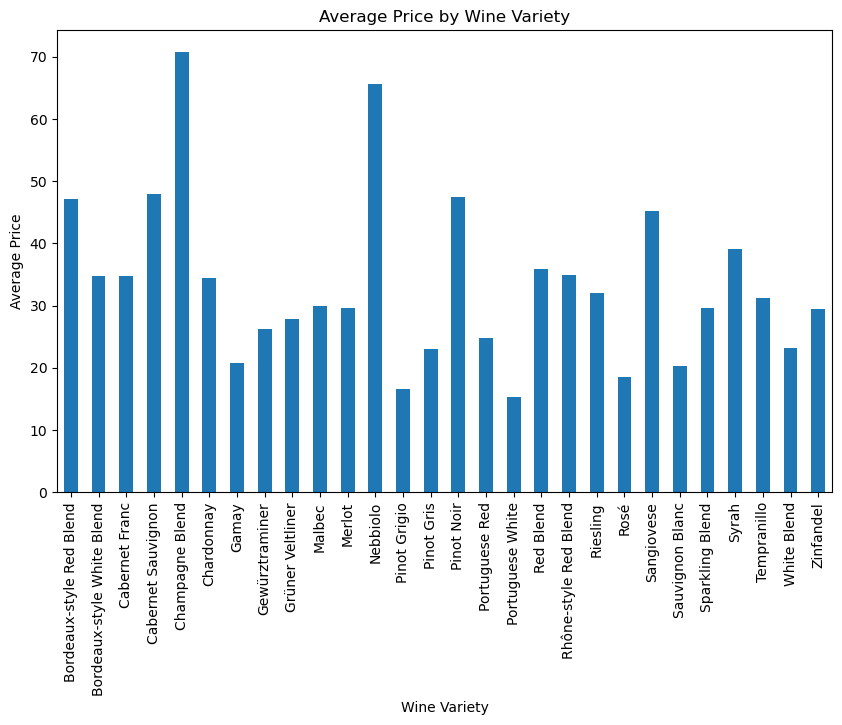

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("OSX_DS_assignment.csv")

# Explore the data
# Example: Display the first few rows of the dataset
data.head()

# Perform exploratory data analysis
# Example: Visualize the distribution of wine varieties
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="variety")
plt.title("Distribution of Wine Varieties")
plt.xlabel("Wine Variety")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Example: Visualize the relationship between points (ratings) and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="points", y="price")
plt.title("Relationship between Points and Price")
plt.xlabel("Points")
plt.ylabel("Price")
plt.show()

# Example: Calculate the average price by wine variety
average_price_by_variety = data.groupby("variety")["price"].mean()
average_price_by_variety.plot(kind="bar", figsize=(10, 6))
plt.title("Average Price by Wine Variety")
plt.xlabel("Wine Variety")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()
